In [23]:
import pandas as pd
import dirty_data as d
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
import imputation as i
import outlier_detection as od
from utils import encoding_categorical_variables as enc
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv("../dataset/heart.csv")
name_class = 'disease'

selected_features = ['oldpeak','cp','thal', name_class]
selected_features_only = ['oldpeak','cp','thal']
df = df[selected_features]
quality = pd.DataFrame([50,60,70,80,90])
perc_quality = [50,60,70,80,90]

param = {
    'DecisionTree': 70,
    'LogisticRegression': 1,
    'KNN': 8,
    'RandomForest': 70,
    'AdaBoost': 90,
    'SVC': 1
}

In [25]:
def improve_completeness(df, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class):
    df_clean = df[selected_features_only].copy()

    df_clean = i.impute(df_clean, imp_1, imp_col_1)
    df_clean = i.impute(df_clean, imp_2, imp_col_2)
    df_clean = i.impute(df_clean, imp_3, imp_col_3)

    df_clean[name_class] = df[name_class]

    return df_clean

def improve_accuracy(df, od_1, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class):

    df_clean = df.copy()

    df_clean = improve_completeness(df_clean, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class)

    indexes_1 = od.outliers(df_clean, od_1, selected_features[0])

    df_clean.loc[indexes_1,selected_features[0]] = np.nan

    df_clean[name_class] = df[name_class]

    return df_clean

In [26]:
df_dirt_50 = d.injection(df, name_class, 50/100, 10, 1)
df_dirt_90 = d.injection(df, name_class, 90/100, 10, 1)
df_100 = df

saved dirty dataset 50%
saved dirty dataset 90%


/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


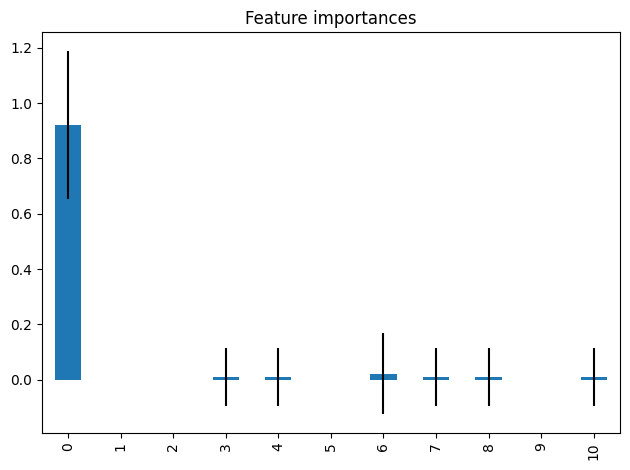

In [27]:
### quality 90%

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_dirt_90[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_dirt_60 = clf.fit(X, df_dirt_90[name_class])
importances_1 = df_dirt_60.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_dirt_60.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
plt.savefig("/Users/camillasancricca/Desktop/" + '90-d' + ".pdf", bbox_inches='tight')
fig.tight_layout()

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


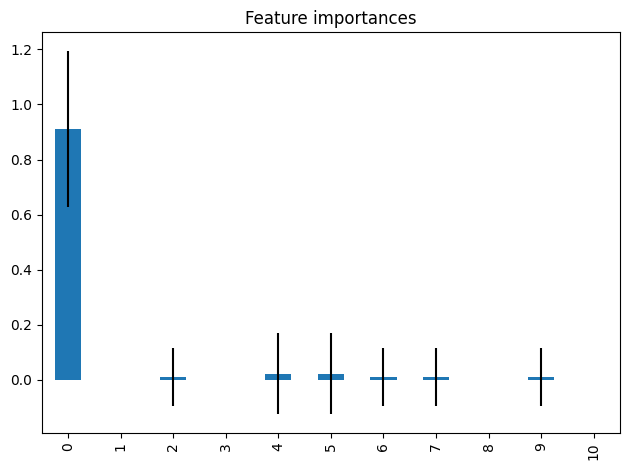

In [28]:
### quality 50%

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_dirt_50[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_dirt_60 = clf.fit(X, df_dirt_50[name_class])
importances_1 = df_dirt_60.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_dirt_60.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
plt.savefig("/Users/camillasancricca/Desktop/" + '50-d' + ".pdf", bbox_inches='tight')
fig.tight_layout()

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


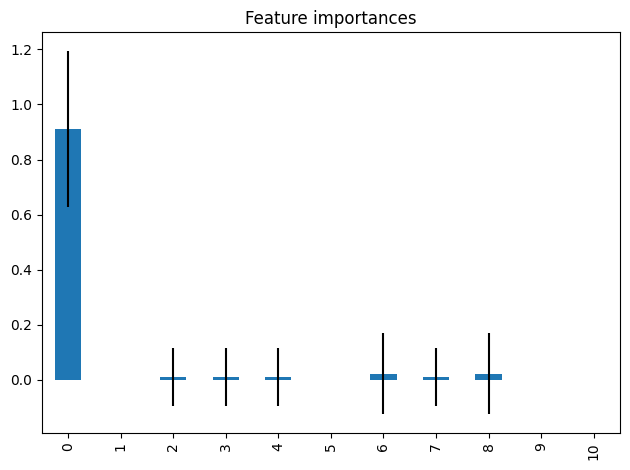

In [29]:
### quality 100%

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_100[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_100 = clf.fit(X, df_100[name_class])
importances_1 = df_100.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_100.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
plt.savefig("/Users/camillasancricca/Desktop/" + '100' + ".pdf", bbox_inches='tight')
fig.tight_layout()

In [33]:
df_dirt_50 = d.injection(df, name_class, 50/100, 10, 1)
df_dirt_90 = d.injection(df, name_class, 90/100, 10, 1)

df_clean_50 = improve_accuracy(df_dirt_50, 'KNN', 'impute_standard', 'impute_mode',
                                           'impute_mode', 'oldpeak','cp','thal', name_class)
df_dirt_90 = improve_accuracy(df_dirt_90, 'KNN', 'impute_standard', 'impute_mode',
                                           'impute_mode', 'oldpeak','cp','thal', name_class)

saved dirty dataset 50%
saved dirty dataset 90%


/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


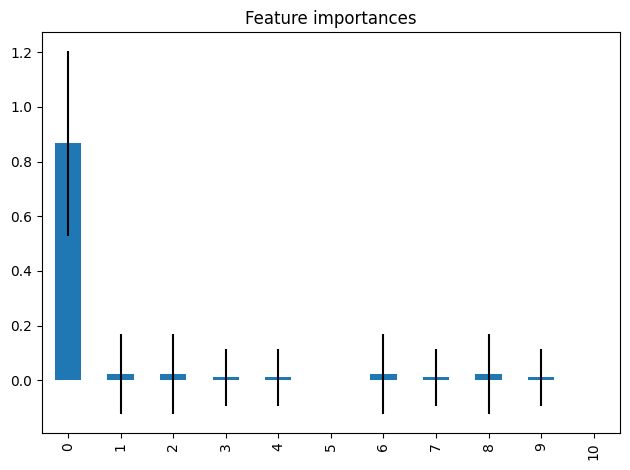

In [31]:
### quality 90%-clean

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_dirt_90[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_clean_50 = clf.fit(X, df_dirt_90[name_class])
importances_1 = df_clean_50.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_clean_50.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
plt.savefig("/Users/camillasancricca/Desktop/" + '90-c' + ".pdf", bbox_inches='tight')
fig.tight_layout()

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


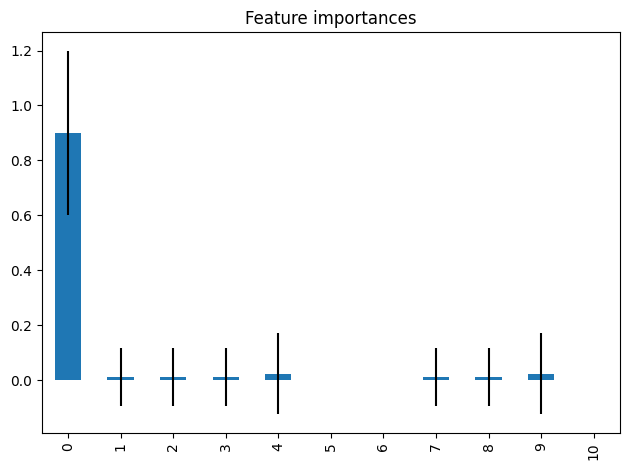

In [34]:
### quality 50%-clean

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_clean_50[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_clean_50 = clf.fit(X, df_clean_50[name_class])
importances_1 = df_clean_50.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_clean_50.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
plt.savefig("/Users/camillasancricca/Desktop/" + '50-c' + ".pdf", bbox_inches='tight')
fig.tight_layout()